# MLP - FashionMNIST

### Import Libraries

In [1]:
import time
import numpy as np
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import matplotlib.pyplot as plt
from livelossplot import PlotLossesKeras

### Methods Definition

In [2]:
# View 6 images of FashionMNIST in a gray scale
def visualize_fashion_mnist(X_train, y_train, X_test, y_test):
    plt.subplot(321)
    plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
    plt.subplot(322)
    plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
    plt.subplot(323)
    plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
    plt.subplot(324)
    plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
    plt.subplot(325)
    plt.imshow(X_train[4], cmap=plt.get_cmap('gray'))
    plt.subplot(326)
    plt.imshow(X_train[5], cmap=plt.get_cmap('gray'))
    plt.show()

    
def create_compile_model_mlp(num_pixels, num_classes):
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


def fashion_mnist_using_mlp(X_train, y_train, X_test, y_test):

    # Transform the 28 * 28 matrix of the images into a vector with 784 attributes for each image (because it is multilayer-perceptron)
    # (60000, 28, 28)
    num_pixels = X_train.shape[1] * X_train.shape[2]
    X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
    X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

    # Normalize the pixel values from 0-255 to 0-1
    X_train = X_train / 255
    X_test = X_test / 255

    # Transform the label which is an integer into binary categories
    # The value becomes that corresponding to the position, class 5 becomes the list [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)

    # Output from 0 to 9 -> 10 possibilities
    num_classes = y_test.shape[1]

    # Define the network topology and compile
    model = create_compile_model_mlp(num_pixels, num_classes)
    #print(model.summary())
    print_model(model, "model_fashion_mnist_mlp.png")
    plotlosses = PlotLossesKeras()

    # Training the network
    history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=200, verbose=1, callbacks=[PlotLossesKeras()])
    
    #print_history_accuracy(history)
    #print_history_loss(history)

    # Final evaluation with the test cases
    scores = model.evaluate(X_test, y_test, verbose=0)

    #print('Scores: ', scores)
    print("MLP model accuracy FashionMNIST: %.2f%%" % (scores[1]*100))
    print("MLP model loss FashionMNIST: %.3f" % (scores[0]))


# Useful to visualize the tipology of the network in pdf or png
def print_model(model, fich):
    from keras.utils import plot_model
    plot_model(model, to_file=fich, show_shapes=True, show_layer_names=True)


# Utils to visualize the history of the learning
def print_history_accuracy(history):
    print(history.history.keys())
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


def print_history_loss(history):
    print(history.history.keys())
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

### Load Data

In [3]:
((x_train, y_train), (x_test, y_test)) = fashion_mnist.load_data()

### Visualize Data

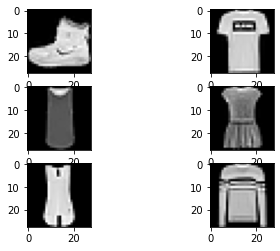

In [4]:
visualize_fashion_mnist(x_train, y_train, x_test, y_test)

### Model Execution

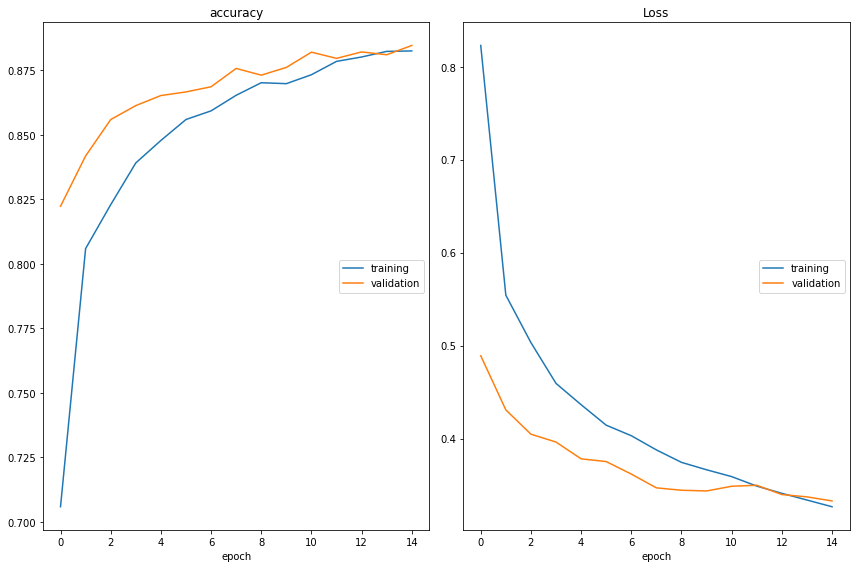

accuracy
	training         	 (min:    0.706, max:    0.882, cur:    0.882)
	validation       	 (min:    0.822, max:    0.885, cur:    0.885)
Loss
	training         	 (min:    0.327, max:    0.823, cur:    0.327)
	validation       	 (min:    0.333, max:    0.489, cur:    0.333)
MLP model accuracy FashionMNIST: 88.46%
MLP model loss FashionMNIST: 0.333
Processing Time: 74.886 seconds


In [5]:
start_time = time.time()
fashion_mnist_using_mlp(x_train, y_train, x_test, y_test)
time_taken = time.time() - start_time

print("Processing Time: %.3f seconds" % (time_taken))